In [1]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import keras
import random

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Conv2D, MaxPool2D,MaxPooling2D, Dropout, Dense, Flatten
import visualkeras

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, f1_score 
from sklearn.metrics import accuracy_score

In [3]:
from keras.models import load_model

In [4]:
train_path = r'C:\Users\LAPTOPBD\Tanvir\data\New folder (3)\1training'
test_path = r'C:\Users\LAPTOPBD\Tanvir\data\New folder (3)\2testing'
val_path = r'C:\Users\LAPTOPBD\Tanvir\data\New folder (3)\3vali'

Bloom


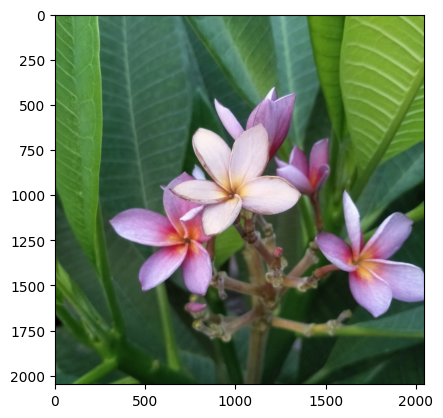

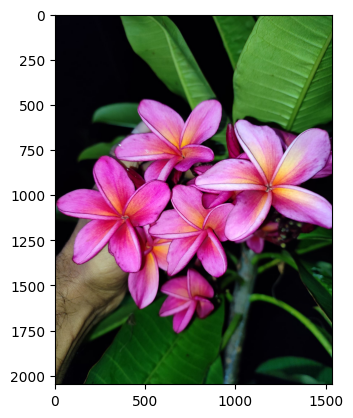

Post Bloom


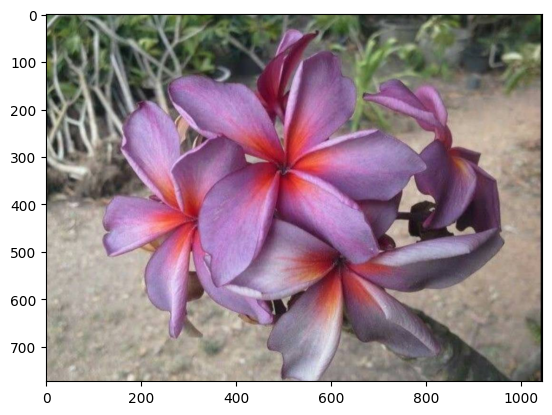

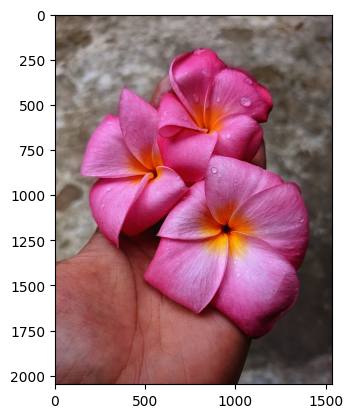

Pre Bloom


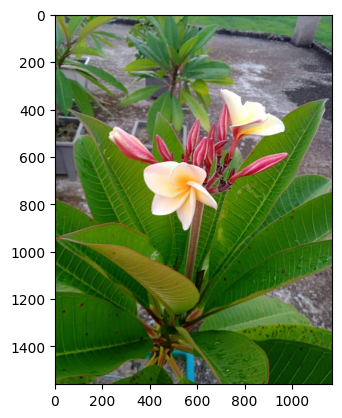

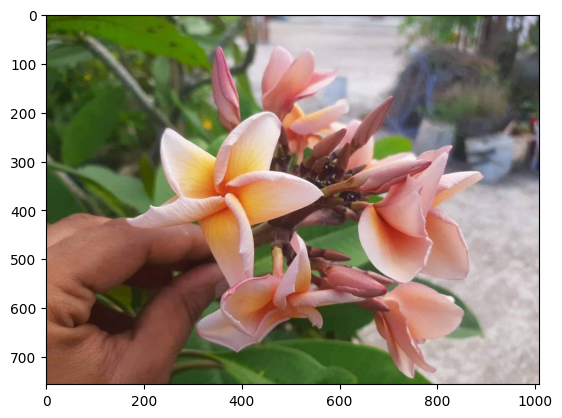

In [5]:
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder
    
    print(folder)
    for i in range(2):
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path)
        imgplot = plt.imshow(img)
        plt.show()

In [6]:
def imagearray(path, size):
    data = []
    for folder in os.listdir(path):
        sub_path=path+"/"+folder

        for img in os.listdir(sub_path):
            image_path=sub_path+ "/" +img
            img_arr=cv2.imread(image_path)
            img_arr=cv2.resize(img_arr, size)
            data.append(img_arr)
            
    return data

In [7]:
size = (250,250)

In [8]:
train = imagearray(train_path, size)
test = imagearray(test_path, size)
val = imagearray(val_path, size)

In [9]:
x_train = np.array(train)
x_test = np.array(test)
x_val = np.array(val)

In [10]:
x_train = x_train/255.0
x_test = x_test/255.0
x_val = x_val/255.0

In [11]:
def data_class(data_path, size, class_mode):
    datagen = ImageDataGenerator(rescale = 1./255)
    classes = datagen.flow_from_directory(data_path,
                                          target_size = size,
                                          batch_size = 32,
                                          class_mode = class_mode)
    return classes

In [12]:
train_class = data_class(train_path, size, 'sparse')
test_class = data_class(test_path, size, 'sparse')
val_class = data_class(val_path, size, 'sparse')

Found 2991 images belonging to 3 classes.
Found 854 images belonging to 3 classes.
Found 428 images belonging to 3 classes.


In [13]:
y_train = train_class.classes
y_test = test_class.classes
y_val = val_class.classes

In [14]:
train_class.class_indices

{'Bloom': 0, 'Post Bloom': 1, 'Pre Bloom': 2}

In [15]:
y_train.shape,y_test.shape,y_val.shape

((2991,), (854,), (428,))

In [16]:
tf.keras.backend.clear_session()

In [17]:
model1_1 = load_model(r'C:\Users\LAPTOPBD\Tanvir\final code\final\model\model1.hdf5')
model2_1 = load_model(r'C:\Users\LAPTOPBD\Tanvir\final code\final\model\model2.hdf5')


In [18]:
models = [model1_1, model2_1]

In [19]:
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

27/27 [==============================] - 29s 989ms/step


In [20]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [21]:
classes=['Bloom','Pre Bloom', 'Post Bloom']

590


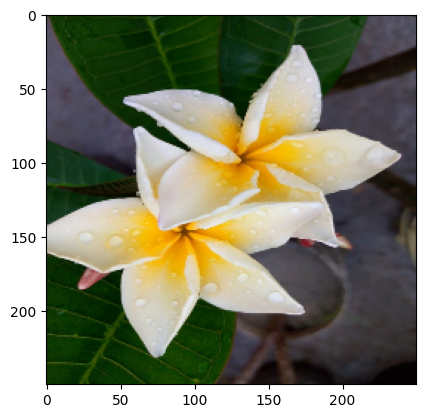

1/1 [==============================] - 0s 115ms/step
[array([[0.7648288 , 0.07902054, 0.15615058]], dtype=float32), array([[0.45489872, 0.47337037, 0.07173079]], dtype=float32), array([[0.62482643, 0.1479849 , 0.22718863]], dtype=float32)]


'Bloom'

In [30]:
#4
from keras.preprocessing import image
import numpy as np
import keras

img_sample=random.randint(0,len(y_test))

print(img_sample)

plt.imshow(cv2.cvtColor(x_test[img_sample, :].astype('float32'), cv2.COLOR_BGR2RGB))
plt.show()

img_pred=(x_test[img_sample, :].astype('float32'))
img_pred=np.expand_dims(img_pred, axis=0)
img_pred=img_pred/255

preds = [model.predict(img_pred) for model in models]

print(preds)

m1 = np.amax(preds[0][0])
p1 = list(preds[0][0]).index(m1)

m2 = np.amax(preds[1][0])
p2 = list(preds[1][0]).index(m2)

m3 = np.amax(preds[2][0])
p3 = list(preds[2][0]).index(m3)

find = {m1:p1, m2:p2, m3:p3}

max = np.amax([m1,m2,m3])


classes[find[max]]


In [29]:
print("preds[0][0]: ",preds[0][0])
m1 = np.amax(preds[0][0])
print("m1: ",m1)
p1 = list(preds[0][0]).index(m1)
print("p1: ",p1)

print("preds[1][0]: ",preds[1][0])
m2 = np.amax(preds[1][0])
print("m2: ",m2)
p2 = list(preds[1][0]).index(m2)
print("p2: ",p2)

print("preds[2][0]: ",preds[2][0])
m3 = np.amax(preds[2][0])
print("m3: ",m3)
p3 = list(preds[2][0]).index(m3)
print("p3: ",p3)

find = {m1:p1, m2:p2, m3:p3}
print("find: ",find)

max = np.amax([m1,m2,m3])
print("max: ",max)

classes[find[max]]
print(find[max])

preds[0][0]:  [0.7648288  0.07902054 0.15615058]
m1:  0.7648288
p1:  0
preds[1][0]:  [0.45487946 0.4734562  0.07166433]
m2:  0.4734562
p2:  1
preds[2][0]:  [0.63178587 0.14556839 0.22264577]
m3:  0.63178587
p3:  0
find:  {0.7648288: 0, 0.4734562: 1, 0.63178587: 0}
max:  0.7648288
0
